In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/analyticsclubproject/sample_submission.csv
/kaggle/input/analyticsclubproject/train_data_dict.csv
/kaggle/input/analyticsclubproject/train.csv
/kaggle/input/analyticsclubproject/test.csv


In [2]:
train_data=pd.read_csv("/kaggle/input/analyticsclubproject/train.csv")
test_data=pd.read_csv("/kaggle/input/analyticsclubproject/test.csv")
sample_submission=pd.read_csv("/kaggle/input/analyticsclubproject/sample_submission.csv")
train_data.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10156551,18375,6,1,95000.0,2,1,21.45,3,17,28,1,3.0
1,10115057,4000,3,4,-1.0,2,2,21.64,0,18,33,0,2.0
2,10030395,15000,10,1,83000.0,2,2,22.90,3,11,44,1,3.0
3,10158544,27500,10,0,100000.0,1,2,9.66,0,5,14,1,2.0
4,10117658,9450,-1,5,28000.0,0,1,34.89,1,9,24,0,2.0


**DATA VISUALIZATION**

In [3]:
train_data

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10156551,18375,6,1,95000.0,2,1,21.45,3,17,28,1,3.0
1,10115057,4000,3,4,-1.0,2,2,21.64,0,18,33,0,2.0
2,10030395,15000,10,1,83000.0,2,2,22.90,3,11,44,1,3.0
3,10158544,27500,10,0,100000.0,1,2,9.66,0,5,14,1,2.0
4,10117658,9450,-1,5,28000.0,0,1,34.89,1,9,24,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131442,10116135,5700,0,1,32000.0,0,2,31.16,1,7,8,1,3.0
131443,10123610,7400,0,5,-1.0,0,1,8.85,0,6,14,1,1.0
131444,10039371,19400,6,5,58000.0,2,2,30.33,1,9,51,0,2.0
131445,10069944,21000,10,0,83000.0,2,2,21.69,1,11,21,1,1.0


In [4]:
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
from sklearn.ensemble import RandomForestClassifier #RandomForestClassifier
from sklearn.preprocessing import StandardScaler

**Tried the accuracy with Data Cleaning by removing rows with -1 in the Annual Income column but there was no improvement in the accuracy as there were false data in the test data also.**


In [5]:
train_data.drop(train_data[train_data['Annual_Income'] < 10].index, inplace = True)
train_data
                      

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10156551,18375,6,1,95000.0,2,1,21.45,3,17,28,1,3.0
2,10030395,15000,10,1,83000.0,2,2,22.90,3,11,44,1,3.0
3,10158544,27500,10,0,100000.0,1,2,9.66,0,5,14,1,2.0
4,10117658,9450,-1,5,28000.0,0,1,34.89,1,9,24,0,2.0
5,10044746,14000,10,0,60000.0,2,11,14.94,1,9,31,1,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131441,10127326,5000,4,5,50000.0,2,2,14.71,0,8,18,0,2.0
131442,10116135,5700,0,1,32000.0,0,2,31.16,1,7,8,1,3.0
131444,10039371,19400,6,5,58000.0,2,2,30.33,1,9,51,0,2.0
131445,10069944,21000,10,0,83000.0,2,2,21.69,1,11,21,1,1.0


In [6]:
print('train_columns:',train_data.columns.to_list())
print('test_colums:',test_data.columns.to_list())

train_columns: ['Loan_ID', 'Loan_Amount_Requested', 'Length_Employed', 'Home_Owner', 'Annual_Income', 'Income_Verified', 'Purpose_Of_Loan', 'Debt_To_Income', 'Inquiries_Last_6Mo', 'Number_Open_Accounts', 'Total_Accounts', 'Gender', 'Interest_Rate']
test_colums: ['Loan_ID', 'Loan_Amount_Requested', 'Length_Employed', 'Home_Owner', 'Annual_Income', 'Income_Verified', 'Purpose_Of_Loan', 'Debt_To_Income', 'Inquiries_Last_6Mo', 'Number_Open_Accounts', 'Total_Accounts', 'Gender']


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111307 entries, 0 to 131446
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Loan_ID                111307 non-null  int64  
 1   Loan_Amount_Requested  111307 non-null  int64  
 2   Length_Employed        111307 non-null  int64  
 3   Home_Owner             111307 non-null  int64  
 4   Annual_Income          111307 non-null  float64
 5   Income_Verified        111307 non-null  int64  
 6   Purpose_Of_Loan        111307 non-null  int64  
 7   Debt_To_Income         111307 non-null  float64
 8   Inquiries_Last_6Mo     111307 non-null  int64  
 9   Number_Open_Accounts   111307 non-null  int64  
 10  Total_Accounts         111307 non-null  int64  
 11  Gender                 111307 non-null  int64  
 12  Interest_Rate          111307 non-null  float64
dtypes: float64(3), int64(10)
memory usage: 11.9 MB


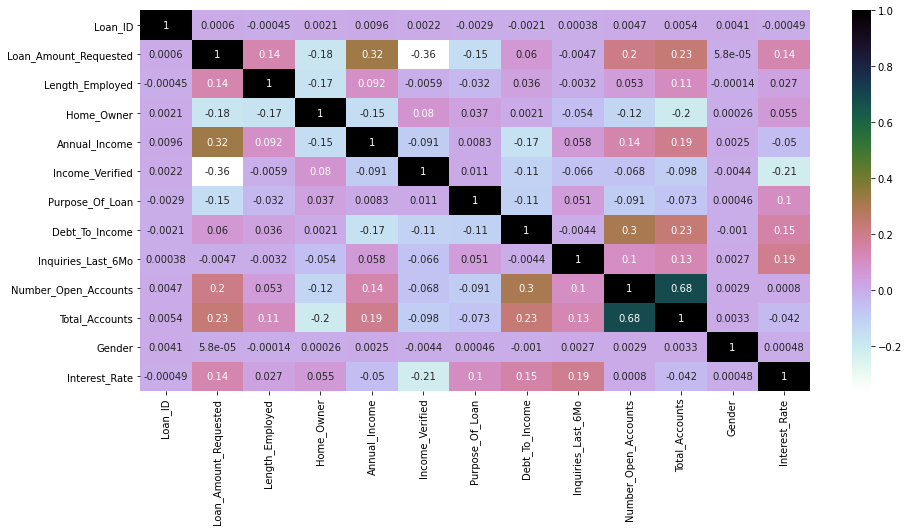

In [8]:
plt.figure(figsize=(15,7)) 
sns.heatmap(train_data.corr(),annot=True,cmap='cubehelix_r')
plt.show()

**INSIGHT**

**We use the relation from the heatplot to see which all features affect Interest_Rate the most and use those features in the Model.**

Here we see that 

* The **Debt_To_Income,Loan_Amount_Requested,Inquiries_Last_6Mo,Purpose_Of_Loan,Income_Verified,Home_Owner,Annual_Income,Total_Accounts**
  are the features that most affect the target variable.
* The magnitude of each box shows the correlation between each feature. Negative values shows that they are inversely related.
* Loan_Id, Number_Open_Accounts and Gender are show the least correlation to our target variable Interest_Rate 


So we put these features in different model and select the one wich gives us the best accuracy.

<AxesSubplot:xlabel='Annual_Income', ylabel='Debt_To_Income'>

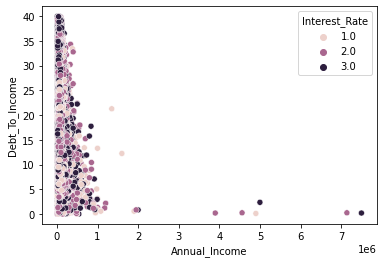

In [9]:
sns.scatterplot(data=train_data,x="Annual_Income",y="Debt_To_Income",hue="Interest_Rate")


**INSIGHT**
Regression models cannot be used as the data is intermixed and cannot be seperated by a single curve or line. 

<AxesSubplot:xlabel='Income_Verified', ylabel='Loan_Amount_Requested'>

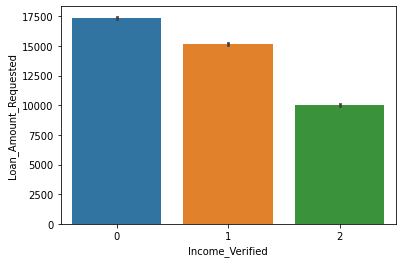

In [10]:
sns.barplot(x='Income_Verified',y='Loan_Amount_Requested',data=train_data)

**INSIGHT**

People who had more verified income sources requested less money, meaning they were more financially stable.

**TO CHECK WHICH TYPE OF LOAN ASKED FOR MAXIMUM MONEY**

<AxesSubplot:xlabel='Purpose_Of_Loan', ylabel='Loan_Amount_Requested'>

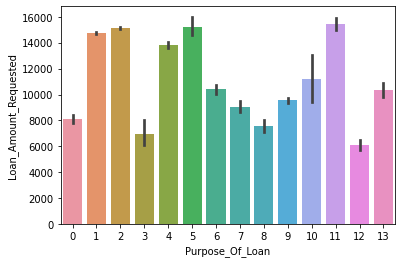

In [11]:
sns.barplot(x='Purpose_Of_Loan',y='Loan_Amount_Requested',data=train_data)

**INSIGHT**

This shows that type 1,2,5 and 11 of loan requested for the most loan amount.

Error bars at the top the graph shows the variability of data and are used on graphs to indicate the error or uncertainty in a reported measurement.

In [12]:
train,test = train_test_split(train_data, test_size = 0.30,random_state=15)
print(train.shape)
print(test.shape)

(77914, 13)
(33393, 13)


**USED ALL RELEVANT FEATURES TO MAXIMIZE ACCURACY**

In [13]:
train_X = train[['Debt_To_Income','Loan_Amount_Requested','Inquiries_Last_6Mo','Purpose_Of_Loan','Income_Verified','Home_Owner','Annual_Income','Total_Accounts','Length_Employed']]# taking the training data features
train_y=train.Interest_Rate #output of our training data
test_X= test[['Debt_To_Income','Loan_Amount_Requested','Inquiries_Last_6Mo','Purpose_Of_Loan','Income_Verified','Home_Owner','Annual_Income','Total_Accounts','Length_Employed']] # taking test data features
test_y =test.Interest_Rate   #output value of test data

**SCALING**(NO IMPROVEMENT IN ACCURACY RATHER WENT DOWN)

In [14]:
#sc=StandardScaler()
#train_X=sc.fit_transform(train_X)
#test_X=sc.fit_transform(test_X)

In [15]:
train_X

,Debt_To_Income,Loan_Amount_Requested,Inquiries_Last_6Mo,Purpose_Of_Loan,Income_Verified,Home_Owner,Annual_Income,Total_Accounts,Length_Employed
63241,24.89,15000,3,2,2,5,47500.0,41,2
21717,9.34,4000,0,1,0,5,24220.0,18,-1
129527,24.06,27050,0,1,0,5,60205.0,21,10
127733,22.04,20575,0,1,1,0,50000.0,26,10
102962,15.18,17000,0,2,0,5,72194.0,41,8
...,...,...,...,...,...,...,...,...,...
57815,5.44,6050,2,2,2,5,17000.0,10,0
80495,10.75,16000,0,1,1,4,45000.0,11,5
9574,25.25,22500,0,2,0,0,90000.0,20,10
62483,17.68,10475,2,1,0,5,50000.0,19,2


In [16]:
test_X

,Debt_To_Income,Loan_Amount_Requested,Inquiries_Last_6Mo,Purpose_Of_Loan,Income_Verified,Home_Owner,Annual_Income,Total_Accounts,Length_Employed
126859,1.92,13700,0,11,0,5,70000.0,23,10
57192,8.13,24000,2,1,1,1,108000.0,37,10
754,19.99,7025,0,2,1,1,29000.0,11,8
46762,8.34,18000,0,1,2,5,83000.0,17,2
59092,32.84,24000,6,2,0,5,78000.0,36,10
...,...,...,...,...,...,...,...,...,...
1924,27.55,16000,0,9,0,0,50000.0,14,7
75117,14.19,6750,0,2,0,5,19200.0,8,0
28934,14.09,16400,1,2,0,0,46000.0,37,10
20166,7.89,20000,0,2,0,0,180000.0,21,5


**TRAINING THE MODEL**

**XGBooster**

In [17]:
from xgboost import XGBClassifier

eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, eval_metric="error", eval_set=eval_set, verbose=True)

In [18]:
model=XGBClassifier()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of the XGBoost Classifier is',metrics.accuracy_score(prediction,test_y))
prediction

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:55:18] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The accuracy of the XGBoost Classifier is 0.5301111011289791


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


array([3., 1., 2., ..., 3., 1., 2.])

**SUBMISSION FILE(PREDICTION)**

In [19]:
features=['Debt_To_Income','Loan_Amount_Requested','Inquiries_Last_6Mo','Purpose_Of_Loan','Income_Verified','Home_Owner','Annual_Income','Total_Accounts','Length_Employed']
test_final_X=pd.get_dummies(test_data[features])



test_final_X

,Debt_To_Income,Loan_Amount_Requested,Inquiries_Last_6Mo,Purpose_Of_Loan,Income_Verified,Home_Owner,Annual_Income,Total_Accounts,Length_Employed
0,16.49,23000,5,1,0,0,130000.0,48,5
1,15.95,16000,0,2,2,0,-1.0,22,10
2,3.65,2500,0,2,2,5,23000.0,10,3
3,31.50,6625,0,2,2,0,53000.0,25,10
4,13.18,9600,1,2,0,0,42600.0,11,8
...,...,...,...,...,...,...,...,...,...
32857,6.89,10000,0,2,2,0,72503.0,20,10
32858,10.83,12000,3,8,0,5,125000.0,28,2
32859,19.13,12000,0,2,2,0,81232.0,39,10
32860,21.70,19950,1,2,1,0,79000.0,41,10


In [20]:
prediction_1=model.predict(test_final_X)
prediction_1

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


array([3., 1., 2., ..., 1., 3., 3.])

In [21]:
predictiondf=pd.DataFrame(prediction_1,columns=['Interest_Rate'])
predictiondf

,Interest_Rate
0,3.0
1,1.0
2,2.0
3,2.0
4,2.0
...,...
32857,1.0
32858,3.0
32859,1.0
32860,3.0


In [22]:
sample_submission

,Loan_ID,Interest_Rate
0,10048970,2.0
1,10075715,2.0
2,10090330,2.0
3,10139511,2.0
4,10153644,2.0
...,...,...
32857,10091923,2.0
32858,10128716,2.0
32859,10037200,2.0
32860,10019409,2.0


In [23]:
sample_submission=sample_submission.drop(['Interest_Rate'],axis=1)
sample_submission


,Loan_ID
0,10048970
1,10075715
2,10090330
3,10139511
4,10153644
...,...
32857,10091923
32858,10128716
32859,10037200
32860,10019409


In [24]:
submission=pd.concat([sample_submission,predictiondf], axis=1)
submission

,Loan_ID,Interest_Rate
0,10048970,3.0
1,10075715,1.0
2,10090330,2.0
3,10139511,2.0
4,10153644,2.0
...,...,...
32857,10091923,1.0
32858,10128716,3.0
32859,10037200,1.0
32860,10019409,3.0


To check whether there is overfitting by taking the number of each class

In [25]:
submission.loc[submission.Interest_Rate == 3.0, 'Interest_Rate'].count()

10687

In [26]:
submission.to_csv('submission_12.csv', index=False)
